## Why do we need parsing? 

<br>

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/aaaaaa.png" width="500"> 

## What is HTML? 

**HTML (HyperText Markup Language)**  — it is the same markup language as Markdown or LaTeX. It is the standard for writing various sites. Commands in this language are called **tags**. If you open absolutely any site, click on the right mouse button, and then click `View page source`, then you will see the HTML skeleton of this site.

This is how you can open the html-code of the starting Yandex, find news from the top in it and change it a little. It is clear that you change the html page this way only on your computer (client). The original version remains on the Yandex server. When you refresh the page, all edits will disappear.


An HTML page is nothing more than a collection of nested tags. You may notice, for example, the following tags:

- `<title>` – title of the page
- `<h1>…<h6>` – headings of different levels
- `<p>` – paragraph
- `<div>` - selection of a fragment of the document in order to change the type of content
- `<table>` - drawing the table
- `<tr>` - separator for rows in the table
- `<td>` - separator for columns in the table
- `<b>` - sets the font to bold

Usually the command `<...>` opens a tag, and `</ ...>` closes it. Everything between these two commands obeys the rule that the tag dictates. For example, everything between `<p>` and `</p>` is a separate paragraph.

Tags form a kind of tree rooted in the `<html>` tag and break the page into different logical pieces. Each tag has its own descendants (children) - those tags that are nested in it and their parents.

For example, an HTML page tree might look like this:


````
<html>
<head> Page Title </head>
<body>
    <div>
        Some text
    </div>
    <div>
        More text
            <b>
                More text but in bold
            </b>
    </div>
    Even more text
</body>
</html>
````

You can work with this html as with text, or you can work with a tree. Traversing this tree is web page parsing. We will just find the nodes we need among all this variety and take information from them!

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/tree.png" width="450"> 

## Parsing book prices

* http://books.toscrape.com

In [2]:
import requests

In [3]:
url = 'https://books.toscrape.com/catalogue/page-1.html'

In [4]:
r = requests.get(url)

In [5]:
r

<Response [200]>

In [7]:
r.content[:1000]

b'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon"

In [9]:
r.text[:1000]

'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" 

In [10]:
from bs4 import BeautifulSoup

In [11]:
tree = BeautifulSoup(r.content, 'html.parser')

In [12]:
books = tree.find_all('article', {'class': 'product_pod'})

In [13]:
len(books)

20

In [15]:
type(books)

bs4.element.ResultSet

In [17]:
books[0]

<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [37]:
books[0].p.get('class')[1]

'Three'

In [19]:
books[0].find('p', {'class': 'price_color'}).text

'£51.77'

In [28]:
books[0].h3.a

<a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [29]:
books[0].h3.a.get('title')

'A Light in the Attic'

In [30]:
books[0].h3.a.get('href')

'a-light-in-the-attic_1000/index.html'

In [32]:
'https://books.toscrape.com/catalogue/' + books[0].h3.a.get('href')

'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'

In [33]:
'https://books.toscrape.com/catalogue/page-{}.html'.format(5)

'https://books.toscrape.com/catalogue/page-5.html'

In [52]:
def get_page(page_number):
    url = 'https://books.toscrape.com/catalogue/page-{}.html'.format(page_number)
    r = requests.get(url)
    tree = BeautifulSoup(r.content, 'html.parser')
    books = tree.find_all('article', {'class': 'product_pod'})
    info = []
    prefix = 'https://books.toscrape.com/catalogue/'
    for book in books:
        info.append({'title': book.h3.a.get('title'),
                    'price': book.find('p', {'class': 'price_color'}).text,
                     'rating': book.p.get('class')[1],
                    'url': prefix + book.h3.a.get('href')})
    return info

In [75]:
import time

In [77]:
info_all = []
i = 0
for page_num in range(1, 51):
    try:
        info_all.extend(get_page(page_num))
        time.sleep(3)
        i += 1
        if i % 10 == 0:
            pd.DataFrame(info_all).to_csv('page_{}.csv'.format(i), index=False)
    except:
        print(page_num)

In [78]:
import numpy as np

In [83]:
x = [1, 2, 3, -10, 0, -17, -23, 14]
for num in x:
    print(num / 0)

ZeroDivisionError: division by zero

In [85]:
x = [1, 2, 3, -10, 0, -17, -23, 14]
for num in x:
    try: 
        print(num / 0)
    except ZeroDivisionError:
        print('0')

0
0
0
0
0
0
0
0


In [ ]:
# [1] + [2] - > [1, 2]

In [54]:
len(info_all)

1000

In [55]:
info_all[:3]

[{'title': 'A Light in the Attic',
  'price': '£51.77',
  'rating': 'Three',
  'url': 'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html'},
 {'title': 'Tipping the Velvet',
  'price': '£53.74',
  'rating': 'One',
  'url': 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html'},
 {'title': 'Soumission',
  'price': '£50.10',
  'rating': 'One',
  'url': 'https://books.toscrape.com/catalogue/soumission_998/index.html'}]

In [56]:
import pandas as pd

In [57]:
df = pd.DataFrame(info_all)

In [58]:
df.head()

,title,price,rating,url
0,A Light in the Attic,£51.77,Three,https://books.toscrape.com/catalogue/a-light-i...
1,Tipping the Velvet,£53.74,One,https://books.toscrape.com/catalogue/tipping-t...
2,Soumission,£50.10,One,https://books.toscrape.com/catalogue/soumissio...
3,Sharp Objects,£47.82,Four,https://books.toscrape.com/catalogue/sharp-obj...
4,Sapiens: A Brief History of Humankind,£54.23,Five,https://books.toscrape.com/catalogue/sapiens-a...


In [59]:
df.to_csv('books.csv', index=False)

In [49]:
df2 = pd.read_csv('books.csv')

In [50]:
df2.head()

,Unnamed: 0,title,price,rating,href
0,0,A Light in the Attic,£51.77,Three,a-light-in-the-attic_1000/index.html
1,1,Tipping the Velvet,£53.74,One,tipping-the-velvet_999/index.html
2,2,Soumission,£50.10,One,soumission_998/index.html
3,3,Sharp Objects,£47.82,Four,sharp-objects_997/index.html
4,4,Sapiens: A Brief History of Humankind,£54.23,Five,sapiens-a-brief-history-of-humankind_996/index...


In [60]:
df.head()

,title,price,rating,url
0,A Light in the Attic,£51.77,Three,https://books.toscrape.com/catalogue/a-light-i...
1,Tipping the Velvet,£53.74,One,https://books.toscrape.com/catalogue/tipping-t...
2,Soumission,£50.10,One,https://books.toscrape.com/catalogue/soumissio...
3,Sharp Objects,£47.82,Four,https://books.toscrape.com/catalogue/sharp-obj...
4,Sapiens: A Brief History of Humankind,£54.23,Five,https://books.toscrape.com/catalogue/sapiens-a...


In [61]:
df['price'][0]

'£51.77'

In [63]:
float(df['price'][0][1:])

51.77

In [65]:
df['price_int'] = df['price'].apply(lambda x: float(x[1:]))

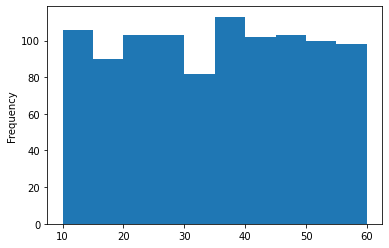

In [66]:
df['price_int'].plot.hist();

In [67]:
import seaborn as sns

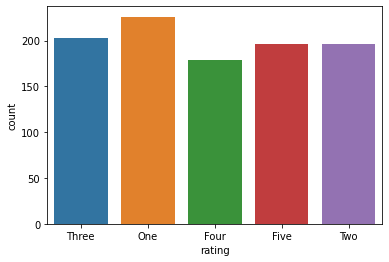

In [70]:
sns.countplot(x='rating', data=df);

In [72]:
df['rating_int'] = df['rating'].map({
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
})

In [73]:
df.head()

,title,price,rating,url,price_int,rating_int
0,A Light in the Attic,£51.77,Three,https://books.toscrape.com/catalogue/a-light-i...,51.77,3
1,Tipping the Velvet,£53.74,One,https://books.toscrape.com/catalogue/tipping-t...,53.74,1
2,Soumission,£50.10,One,https://books.toscrape.com/catalogue/soumissio...,50.10,1
3,Sharp Objects,£47.82,Four,https://books.toscrape.com/catalogue/sharp-obj...,47.82,4
4,Sapiens: A Brief History of Humankind,£54.23,Five,https://books.toscrape.com/catalogue/sapiens-a...,54.23,5


## Parsing quotes

Imagine you have to collect data from the site https://quotes.toscrape.com/.

You need to get a pandas dataframe with columns:
* `quote` - quote
* `author` - author
* `tag_name` - 1 if this tag is in the quote, and 0 if not. The number of such columns is equal to the number of tags on the site.

Print all quotes that have the "truth" tag.

## Lifehacks




* Error 403, 404, 504, $\ldots$ 
* Captcha
* Messages that suspicious traffic has been detected from your device

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/doge.jpg" width="450"> 

### be patient

* Too frequent requests annoy the server
* Put time delays between them

In [76]:
import time
time.sleep(10) # и пусть весь мир подождёт 3 секунды

### b) look like a person


A normal person's request through a browser looks like this:

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/browser_get.png" width="600"> 
    
With it, a lot of information gets to the server! The request from python looks like this:


<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/python_get.jpg" width="250"> 
 
Did you notice the difference? Obviously, our humble request does not compete with such an abundance of meta
information that is transmitted when requested from a regular browser. Fortunately, no one bothers us to pretend to be human and throw dust in the eyes of the server by generating a fake user agent. There are a lot of libraries that cope with this task, there are a lot, personally, I like [fake-useragent](Https://pypi.org/project/fake-useragent/) When a method is called from various pieces, a random combination of operating system, specifications, and browser version that can be passed to the request:

In [52]:
!pip install fake_useragent

In [55]:
from fake_useragent import UserAgent
UserAgent().chrome

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2656.18 Safari/537.36'

For example, https://knowyourmeme.com/ will not want to let python into itself and will throw a 403 error. It is issued by the server if it is available and capable of processing requests, but refuses to do so for some personal reasons.

In [53]:
url = 'https://knowyourmeme.com/'

response = requests.get(url)
response

<Response [403]>

And if you generate a User-Agent, the server will not have any questions.

In [56]:
response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
response

<Response [200]>

### c) communicate through intermediaries

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/proxy.jpeg" width="400"> 

Let's look at our ip-address without a proxy.

In [22]:
r = requests.get('https://httpbin.org/ip')
print(r.json())

{'origin': '195.208.27.151, 195.208.27.151'}


Now let's try to see what happens if you connect a proxy.

In [24]:
proxies = {
    'http': '182.53.206.47:47592',
    'https': '182.53.206.47:47592'
}

r = requests.get('https://httpbin.org/ip', proxies=proxies)

print(r.json())

{'origin': '182.53.206.47, 182.53.206.47'}


The request worked a little longer, the ip address has changed. Most of the proxies you find don't work. Sometimes the request takes a very long time and it is more profitable to drop it and try another proxy. This can be configured with the `timeout` option. For example, if the server does not respond for a second, the code will crash. 

In [27]:
import requests
requests.get('http://www.google.com', timeout=1)

<Response [200]>

There are quite a few interesting gadgets for requests. You can see them in the [guide from the documentation.](Https://requests.readthedocs.io/en/master/user/advanced/)


__Where can I try to get proxy lists:__

* https://qna.habr.com/q/591069
* https://getfreeproxylists.blogspot.com/
* Most free proxies usually don't work. Write a parser that will collect lists from proxies and try to apply them.

### d) go deeper

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/tor.jpg" width="600"> 

You can try to bypass evil servers through the Tor browser. 

## Combining everything

1. Start small
2. If the website continues to ban, add new features
3. Every new feature decreases speed